In [1]:
# imports
import numpy as np
import pandas as pd

In [2]:
# read in data
df = pd.read_csv('./players_scores.csv').set_index('student_name')
print(df)

                       math_score  data_science_score
student_name                                         
Giannis Antetokounmpo          82                  84
Kobe Bryant                    98                  97
Stephen Curry                  83                  83
Kevin Durant                   95                  97
Joel Embiid                    76                  87
Markelle Fultz                 71                  73
Manu Ginobili                  81                  83
James Harden                   85                  87
Brandon Ingram                 76                  83


## 1 Data Description

In [3]:
scores = df['data_science_score']
# scores = df['math_score']

#### 1. Calculate mean, median, and mode of Data Science scores

In [4]:
print('Mean: {}, Median: {}, Mode: {}'.format(
scores.mean(), scores.median(), scores.mode().values))

Mean: 86.0, Median: 84.0, Mode: [83]


#### 2. Calculate variance and standard deviation of Data Science scores

In [1]:
print('Variance: {}, Standard Deviation: {}'.format(
scores.std()**2, scores.std()))

NameError: name 'scores' is not defined

#### 3. Incremental Mean/Variance Functions

In [6]:
def incremental_mean(mu, n, x_new):
    return ((n*mu)+x_new)/(n+1)

In [7]:
def incremental_var(v, mu, n, x_new):
    mu_new = incremental_mean(mu, n, x_new)
    return ((n-1)*(v) + (x_new - mu)*(x_new - mu_new))/n

In [8]:
u_prime = incremental_mean(mu=scores.mean(), n=len(scores), x_new=100)
print('u\' = {}'.format(u_prime))

u' = 87.4


In [9]:
v_prime = incremental_var(scores.std()**2, scores.mean(), len(scores), 100)
print('v\' = {}'.format(v_prime))

v' = 68.93333333333332


#### Verify Function Correctness

In [10]:
scores_plus = scores.append(pd.Series(100))
print('u\' = {}'.format(scores_plus.mean()))
print('v\' = {}'.format(scores_plus.std()**2))

u' = 87.4
v' = 68.93333333333334


## 2 Data Visualization

In [11]:
import matplotlib.pyplot as plt

In [12]:
math = df['math_score']
data = df['data_science_score']

#### 1. Q-Q Plot

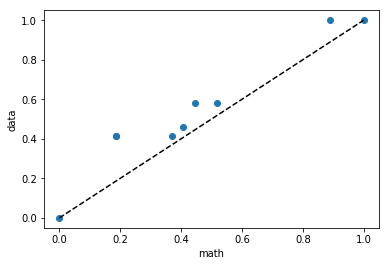

In [13]:
mathM = (math-math.min())/(math.max()-math.min())
dataM = (data-data.min())/(data.max()-data.min())

mathS = mathM.sort_values()
dataS = dataM.sort_values()

plt.figure(1)
plt.plot(mathS, dataS, 'o')
plt.xlabel('math')
plt.ylabel('data')
plt.plot([0,1], [0,1], 'k--')
plt.show()

In [ ]:
# Since the points line above the y=x line, 
# the scores are higher in the data science class, 
# which means data science is the easier class.

#### 2. Scatter Plot

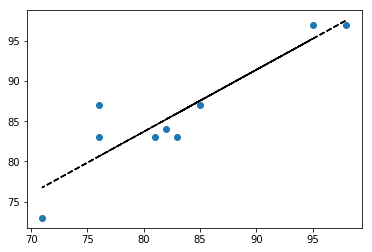

In [14]:
plt.figure(2)
plt.scatter(math, data)
fit = np.polyfit(math, data, deg=1)
plt.plot(math, fit[0]*math+fit[1], 'k--')
plt.show()

In [15]:
# The furthest point appears to be located at
# x=76, y=87, which is associated with Joel Embiid.
# To verify, we can calculate residuals and find the maximum.
res = abs(data-(fit[0]*math+fit[1]))
print(res[res == max(res)])

student_name
Joel Embiid    6.385484
dtype: float64


In [16]:
# We see that our guess is right - nice!

## 3 Data Reduction

In [17]:
import numpy as np
from scipy import sparse
from scipy.sparse import linalg
import matplotlib.pyplot as plt

In [18]:
A = pd.read_csv('./social_graph.csv').set_index('name').as_matrix().astype(float)

In [19]:
U0, S, Vt = linalg.svds(A, k=2)
print('U0:\n{}\n\nS:\n{}\n\nVt:\n{}'.format(U0, S, Vt))

U0:
[[ -9.57037059e-19   4.08248290e-01]
 [  1.10161203e-17   4.08248290e-01]
 [  7.74244941e-17   4.08248290e-01]
 [  1.23019531e-16   4.08248290e-01]
 [ -5.77350269e-01   8.25793665e-18]
 [ -5.77350269e-01   5.06892807e-18]
 [  4.28435485e-17   4.08248290e-01]
 [  3.81660253e-17   4.08248290e-01]
 [ -5.77350269e-01   1.33414746e-17]]

S:
[ 3.  6.]

Vt:
[[  9.71708941e-17   9.71708941e-17   9.71708941e-17   9.71708941e-17
   -5.77350269e-01  -5.77350269e-01   9.71708941e-17   9.71708941e-17
   -5.77350269e-01]
 [  4.08248290e-01   4.08248290e-01   4.08248290e-01   4.08248290e-01
    4.44472322e-18   4.44472322e-18   4.08248290e-01   4.08248290e-01
    4.44472322e-18]]


In [20]:
print('{}\n{}\n{}'.format(U0.shape, S.shape, Vt.shape))

(9, 2)
(2,)
(2, 9)


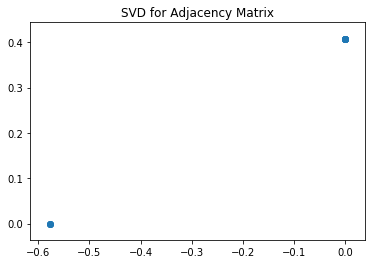

In [24]:
plt.figure(3)
pdscatter = plt.scatter(U0[:,0],U0[:,1])
plt.title('SVD for Adjacency Matrix')
plt.show()

In [22]:
U0

array([[ -9.57037059e-19,   4.08248290e-01],
       [  1.10161203e-17,   4.08248290e-01],
       [  7.74244941e-17,   4.08248290e-01],
       [  1.23019531e-16,   4.08248290e-01],
       [ -5.77350269e-01,   8.25793665e-18],
       [ -5.77350269e-01,   5.06892807e-18],
       [  4.28435485e-17,   4.08248290e-01],
       [  3.81660253e-17,   4.08248290e-01],
       [ -5.77350269e-01,   1.33414746e-17]])

In [ ]:
# It seems that one cluster of students is A-B-C-D-G-H
# The second cluster consists of E-F-I.